# Analyze annual CO2 emission by country level

#### This file would try to explore and analyze the annual CO2 emission by country level. Eventually, we want to build a relationship between CO2 emission amount and the worldwide awareness level. Several steps are taken in this section:
##1.adjust the existing visualization
##2.add geospatical visualization for year 2008
##3.visualize/anaylsis the us emission by years trend √
##4.find the awareness data for most/least emission and compared

In [44]:
conda install geopandas

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [45]:
#import libraries that are needed
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

#### Read in the orginial data from Global Carbon Project (2017)

In [84]:
df_country_emission = pd.read_csv('Datasets/annual_co2_emissions_per_country.csv')

In [85]:
df_country_emission

,Entity,Code,Year,Annual CO₂ emissions (Global Carbon Project (2017)) (tonnes)
0,Afghanistan,AFG,1751,0.0
1,Afghanistan,AFG,1752,0.0
2,Afghanistan,AFG,1753,0.0
3,Afghanistan,AFG,1754,0.0
4,Afghanistan,AFG,1755,0.0
...,...,...,...,...
55985,Zimbabwe,ZWE,2012,7790000.0
55986,Zimbabwe,ZWE,2013,11670000.0
55987,Zimbabwe,ZWE,2014,12010000.0
55988,Zimbabwe,ZWE,2015,11730000.0


In [86]:
df_country_emission= df_country_emission.dropna()
df_country_emission = df_country_emission.rename(index=str, columns={"Annual CO₂ emissions (Global Carbon Project (2017)) (tonnes)": "Annual CO₂ emissions(tonnes)"})

In [87]:
df_country_emission= df_country_emission[df_country_emission['Annual CO₂ emissions(tonnes)'] != 0]
#df_country_emission.rename(index=str, columns = {'Entity':'Country','Code':'Code','Year':'Year','Annual CO₂ emissions(tonnes)':'Annual CO₂ emissions(tonnes)'})
df_country_emission.set_index('Entity', inplace=True)
df_country_emission

,Code,Year,Annual CO₂ emissions(tonnes)
Entity,,,
Afghanistan,AFG,1949,14680.0
Afghanistan,AFG,1950,84410.0
Afghanistan,AFG,1951,91750.0
Afghanistan,AFG,1952,91750.0
Afghanistan,AFG,1953,106430.0
...,...,...,...
Zimbabwe,ZWE,2012,7790000.0
Zimbabwe,ZWE,2013,11670000.0
Zimbabwe,ZWE,2014,12010000.0


In [88]:
df_country_emission = df_country_emission.drop(['World'])
lines = df_country_emission.plot.line(x='Year', y='Annual CO₂ emissions(tonnes)', lw = 4, figsize=(100,50))
plt.title('The global annual emission', size = 100)
#plt.text(x+1, y+1, 'Entity', fontsize = 20)

Text(0.5, 1.0, 'The global annual emission')

In [8]:
us_annuale = df_country_emission.loc[ 'United States' , : ]
us_annuale

,Code,Year,Annual CO₂ emissions(tonnes)
Entity,,,
United States,USA,1800,2.532300e+05
United States,USA,1801,2.679100e+05
United States,USA,1802,2.899300e+05
United States,USA,1803,2.972700e+05
United States,USA,1804,3.339700e+05
...,...,...,...
United States,USA,2012,5.362090e+09
United States,USA,2013,5.514020e+09
United States,USA,2014,5.565490e+09


In [89]:
lines = us_annuale.plot.line(x='Year', y='Annual CO₂ emissions(tonnes)', color='red', lw=8, figsize=(100,50))
plt.title('The annual emission of US', size = 100)

Text(0.5, 1.0, 'The annual emission of US')

#### From the exsiting dataframe, extract new dataframe that includes the CO2 emission of countries in 2008.

In [11]:
df_country_emission_2008 = df_country_emission[df_country_emission['Year'] == 2008]
df_country_emission_2008 = df_country_emission_2008.drop(columns = ['Code','Year'])
df_country_emission_2008

,Annual CO₂ emissions(tonnes)
Entity,
Afghanistan,4.200000e+06
Albania,4.370000e+06
Algeria,1.101200e+08
Andorra,5.400000e+05
Angola,2.569000e+07
...,...
Wallis and Futuna,2.000000e+04
World,3.212039e+10
Yemen,2.232000e+07


#### Anaylsis 2008 country CO2 emission
1. Find the most and the least amount of emission in country level
2. Consider the population of each country and calculate the CO2 emission by capital

In [91]:
sort_df_country_emission_2008 = df_country_emission_2008.sort_values(by = ['Annual CO₂ emissions(tonnes)'], ascending = False)
#sort_df_country_emission_2008 = sort_df_country_emission_2008.drop(['World'])
sort_df_country_emission_2008

,Annual CO₂ emissions(tonnes)
Entity,
World,3.212039e+10
China,7.546890e+09
United States,5.932980e+09
Russia,1.685270e+09
India,1.567100e+09
...,...
Nauru,4.000000e+04
Wallis and Futuna,2.000000e+04
Niue,1.000000e+04


In [92]:
sort_df_country_emission_2008 = df_country_emission_2008.sort_values(by = ['Annual CO₂ emissions(tonnes)'], ascending = False)
#sort_df_country_emission_2008 = sort_df_country_emission_2008.drop(['World'])
ax = sort_df_country_emission_2008.plot.bar(rot=0, figsize=(100,50))
plt.title('Global CO2 Emmission Level in 2008', size = 100)
plt.xlabel('Countries', size = 80)
plt.ylabel('The Amount of Emission', size = 80)

Text(0, 0.5, 'The Amount of Emission')

# with the graph above we see china and us has extremely high emission relatively to other countries

In [16]:
country_most_df_2008 = sort_df_country_emission_2008.head(10)
country_most_df_2008

,Annual CO₂ emissions(tonnes)
Entity,
China,7.546890e+09
United States,5.932980e+09
Russia,1.685270e+09
India,1.567100e+09
Japan,1.237290e+09
Germany,8.535900e+08
Canada,5.721600e+08
Iran,5.411400e+08
United Kingdom,5.398400e+08


Text(0.5, 0, 'Countries')

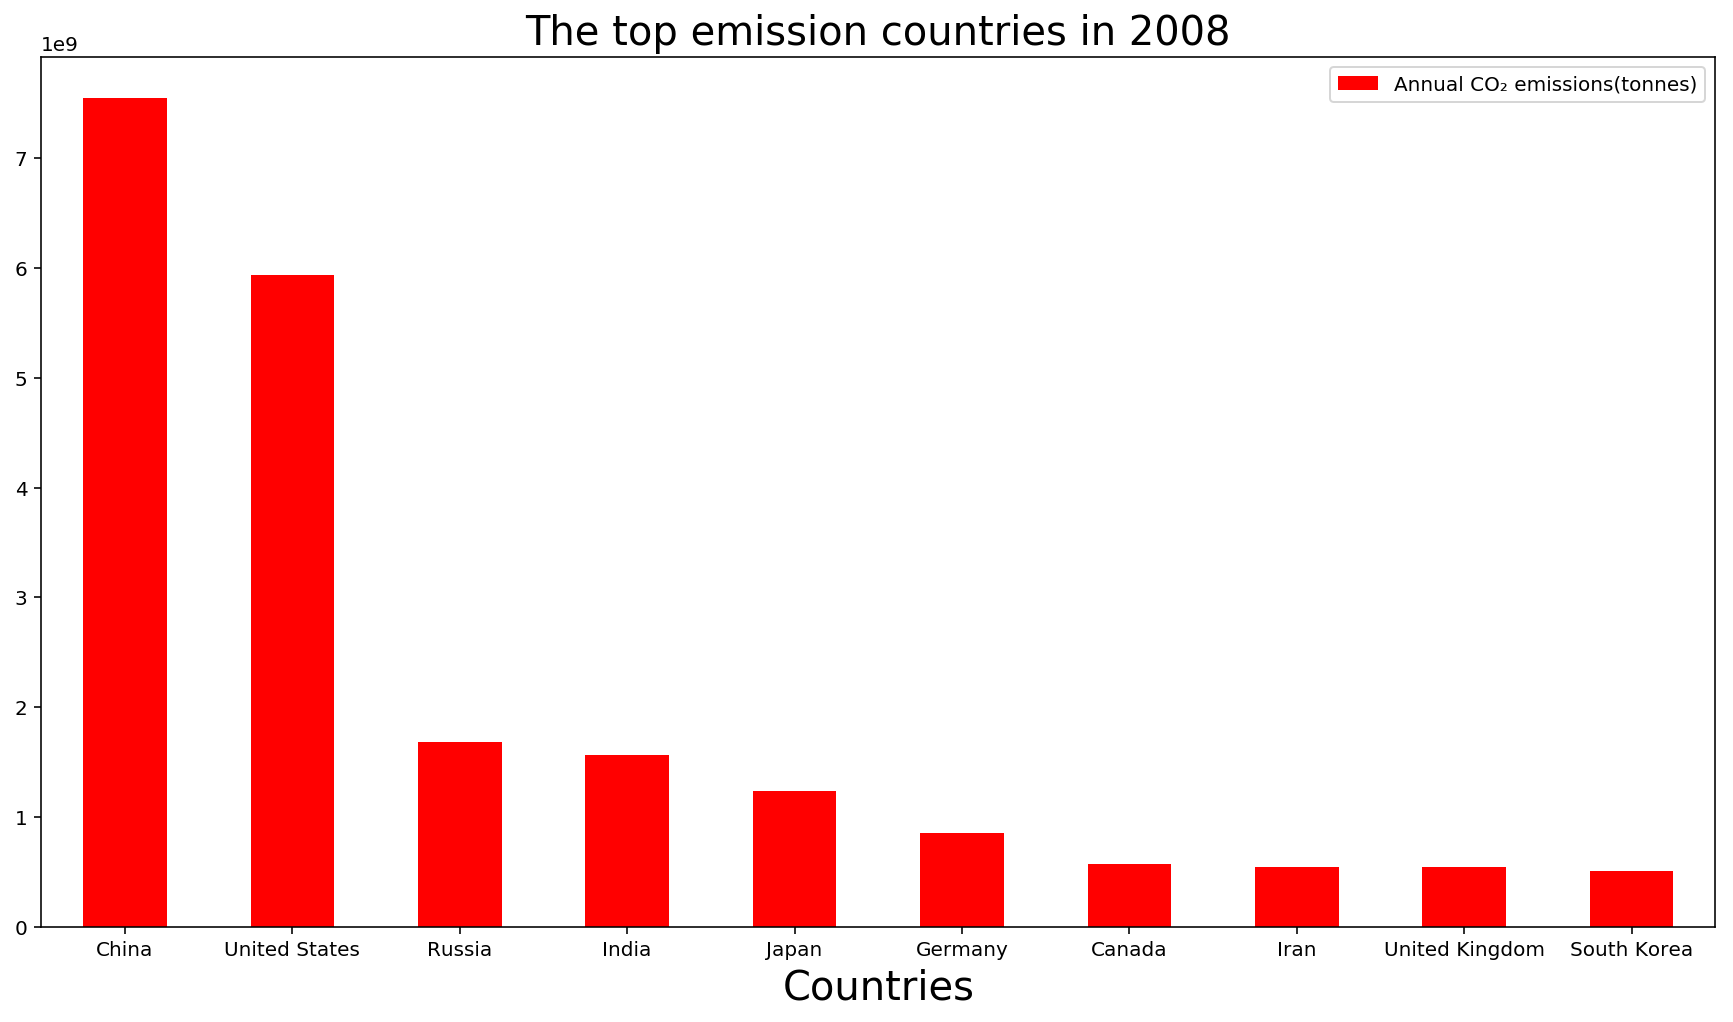

In [27]:
bx = country_most_df_2008.plot.bar(rot=0, figsize = (15,8), color = 'red')
plt.title('The top emission countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [19]:
country_least_df_2008 = sort_df_country_emission_2008.tail(10)
country_least_df_2008

,Annual CO₂ emissions(tonnes)
Entity,
Saint Pierre and Miquelon,70000.0
Cook Islands,70000.0
Falkland Islands,60000.0
Montserrat,50000.0
Kiribati,50000.0
Nauru,40000.0
Wallis and Futuna,20000.0
Niue,10000.0
Saint Helena,10000.0


Text(0.5, 0, 'Countries')

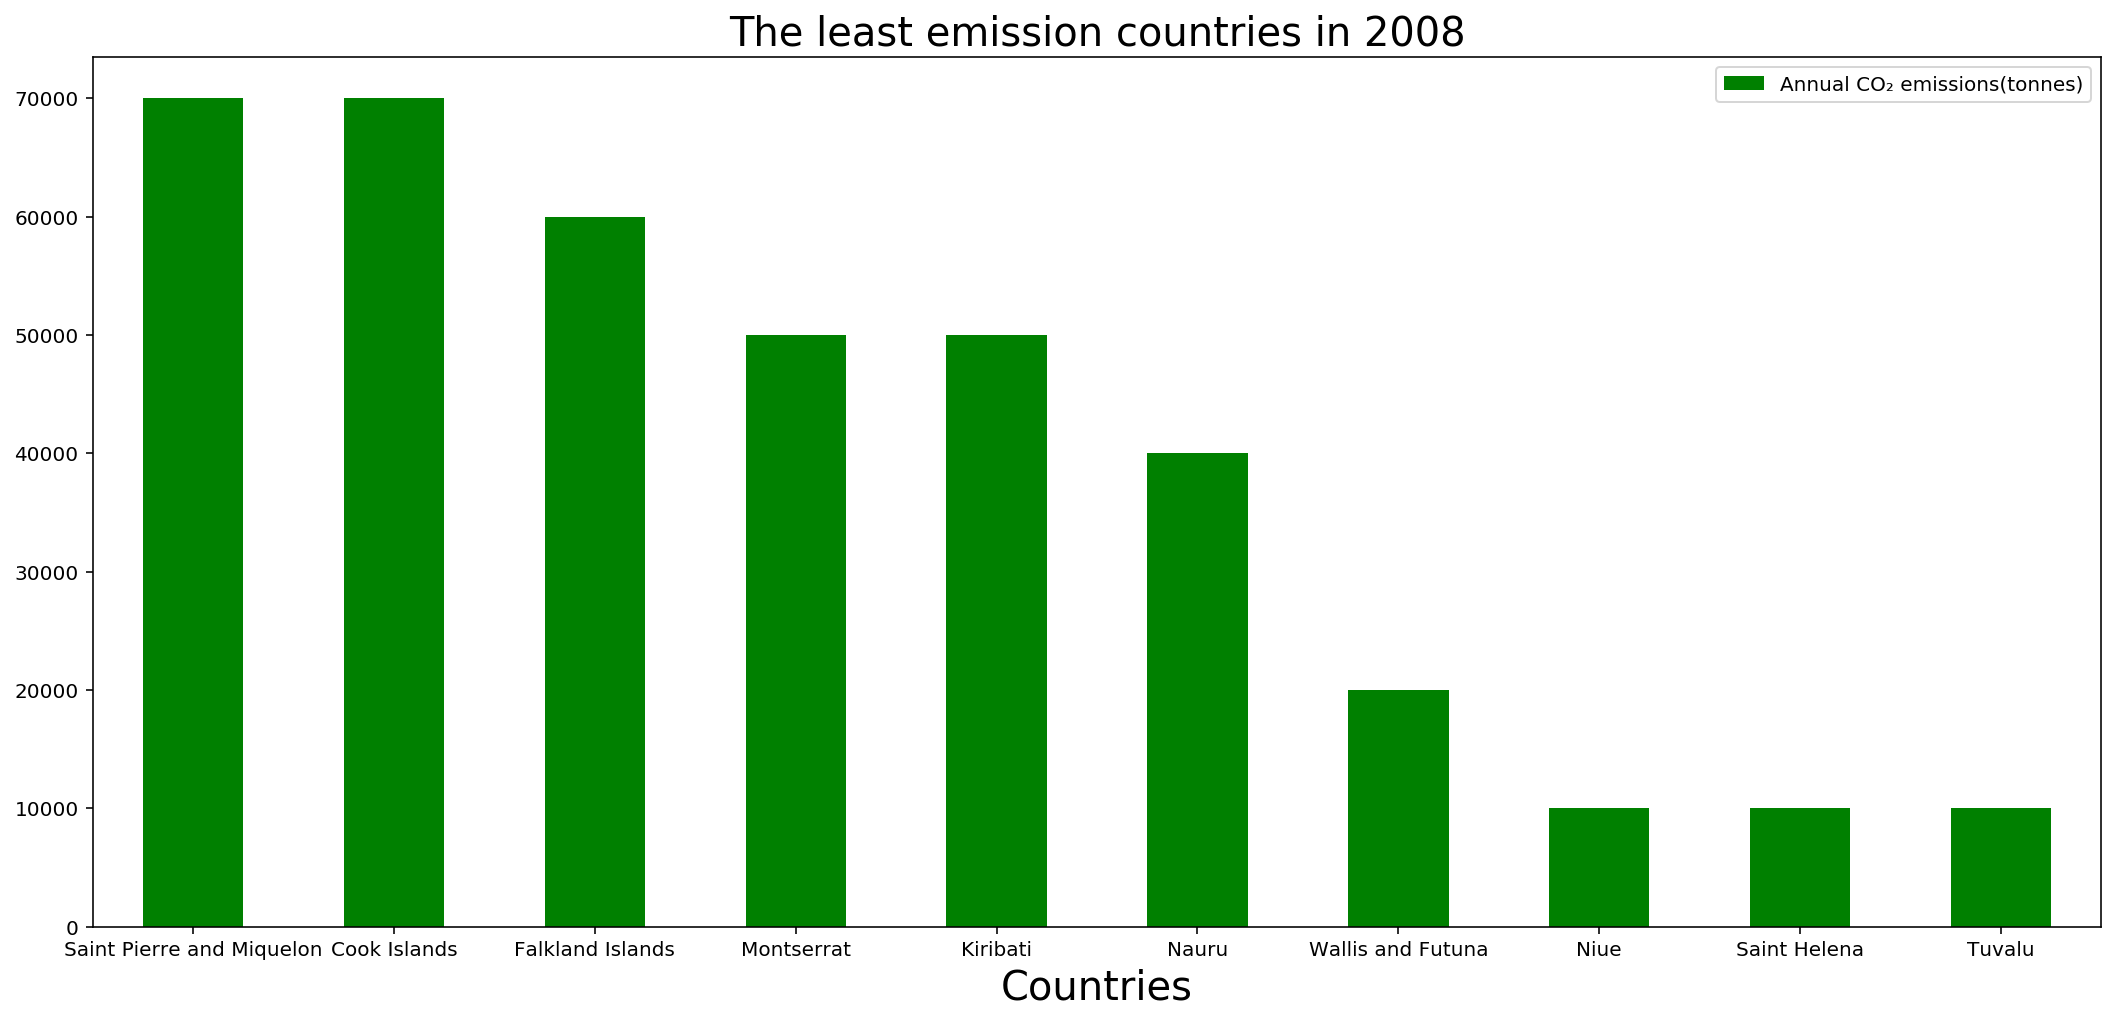

In [30]:
cx = country_least_df_2008.plot.bar(rot=0, figsize=(18,8), color = 'green')
plt.title('The least emission countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

However, the 10 most and least CO2 emission by country level is not a fair rank and could not precisely quantify a countries responsibility for the climate change worldwide. 
By these statistics, it is clear that the top-ranked countries, like China, must contribute more on global warming than low-ranked countries, like Tuvalu, did in year 2008. But the population, the level of industrialization, and other confounds is worthy considering.

Thus, we read another data set which includes population and other confounds to analysis a country's CO2 emission level. Meanly, we compare different countries emission level by emission amount in a year per capita.

In [97]:
df_country = pd.read_excel('Datasets/awareness_by_percentage.xlsx',header=1)
df_country

,WP5,Country,ISO,Region,Sub_region,Sample.2007,Sample.2008,Sample.Total,Population.2008,WPCIAS,...,Ratio_aware,Serious,Not_serious,RF_serious,AUC_serious,CITree_serious,Top1_serious,Top2_serious,Top3_serious,Ratio_serious
0,70,Afghanistan,AFG,Asia,Western Asia,0,1010,1010,1.374134e+07,6.43203,...,5.128087,73.758541,26.241459,76.838235,0.911369,76.84,Education,Cause_Global_Warming,Civic_Engagement,1.111990
1,56,Angola,AGO,Africa,Central Africa,0,1000,1000,9.547243e+06,0.56262,...,1.741134,91.369828,8.630172,91.441441,0.964999,91.44,Local_temp_perception,Cause_Global_Warming,Water_quality,1.087682
2,87,Argentina,ARG,Latin America & Caribbean,Southern South America,1000,1000,2000,2.959425e+07,9.07022,...,1.581608,94.361150,5.638850,94.885246,0.959696,94.89,Cause_Global_Warming,EnvBehavior,Water_quality,9.268735
3,88,Armenia,ARM,Europe,Eastern Europe,1000,1000,2000,2.357567e+06,0.00485,...,1.565761,85.270095,14.729905,85.575049,0.923899,85.58,Urban_Rural,Local_temp_perception,EnvBehavior,1.989427
4,47,Australia,AUS,Europe (Oceania),Western Europe (AustraliaNZ),0,1005,1005,1.728642e+07,6.97902,...,1.012210,78.247424,21.752576,84.237462,0.904631,81.88,Cause_Global_Warming,Gov_effort_env_preservation,EnvBehavior,2.734019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,32,Venezuela,VEN,Latin America & Caribbean,Northern South America,0,1000,1000,1.964048e+07,0.77213,...,1.765261,98.127856,1.872144,98.086124,0.996612,98.09,Cause_Global_Warming,Civic_Engagement,NIL,1.420664
115,50,Vietnam,VNM,Asia,Southeast Asia,1018,1016,2034,6.412354e+07,638.26715,...,1.263532,74.101870,25.898130,77.291667,0.911802,74.86,Local_temp_perception,Civic_Engagement,Religion,2.290308
116,45,South Africa,ZAF,Africa,Southern Africa,1000,1000,2000,3.413674e+07,5.85663,...,1.061832,70.155082,29.844918,72.273325,0.900007,69.91,EnvBehavior,Cause_Global_Warming,Financial_Wellbeing,1.510701
117,67,Zambia,ZMB,Africa,Central Africa,0,1000,1000,6.607533e+06,6.42052,...,2.493193,69.199209,30.800791,79.040404,0.898965,71.46,Cause_Global_Warming,Religion,Water_quality,5.881887


In [98]:
df_country_population = df_country.filter(items=['Country', 'Population.2008'])
df_country_population = df_country_population.rename(index=str, columns={"Country": "Entity", "Population.2008": "Population.2008"})
df_country_population.set_index('Entity', inplace=True)
df_country_population

,Population.2008
Entity,
Afghanistan,1.374134e+07
Angola,9.547243e+06
Argentina,2.959425e+07
Armenia,2.357567e+06
Australia,1.728642e+07
...,...
Venezuela,1.964048e+07
Vietnam,6.412354e+07
South Africa,3.413674e+07


In [99]:

sort_df_country_emission_2008 = sort_df_country_emission_2008.merge(df_country_population, on = 'Entity', validate = 'one_to_one')

In [100]:
sort_df_country_emission_2008['Emission/capita'] = sort_df_country_emission_2008['Annual CO₂ emissions(tonnes)'].div(sort_df_country_emission_2008['Population.2008'].values,axis=0)

sort_df_country_emission_2008

,Annual CO₂ emissions(tonnes),Population.2008,Emission/capita
Entity,,,
China,7.546890e+09,1.076805e+09,7.008594
United States,5.932980e+09,2.430274e+08,24.412801
Russia,1.685270e+09,1.210846e+08,13.918116
India,1.567100e+09,8.108412e+08,1.932684
Japan,1.237290e+09,1.104990e+08,11.197295
...,...,...,...
Rwanda,5.400000e+05,5.651066e+06,0.095557
Chad,5.100000e+05,5.617401e+06,0.090789
Djibouti,5.000000e+05,5.258570e+05,0.950829


In [101]:
df_country_aware = df_country.filter(items=['Country', 'Aware'])
df_country_aware = df_country_aware.rename(index=str, columns={"Country": "Entity", "Population.2008": "Population.2008"})
df_country_aware.set_index('Entity', inplace=True)
df_country_aware

,Aware
Entity,
Afghanistan,25.445975
Angola,42.877795
Argentina,76.460368
Armenia,78.151156
Australia,97.324499
...,...
Venezuela,63.858354
Vietnam,73.538025
South Africa,31.414458


In [106]:
country_emission_awareness_2008 = sort_df_country_emission_2008.merge(df_country_aware, on = 'Entity', validate = 'one_to_one')
country_emission_awareness_2008

,Annual CO₂ emissions(tonnes),Population.2008,Emission/capita,Aware
Entity,,,,
Qatar,6.479000e+07,1.140655e+06,56.800698,64.687182
Luxembourg,1.116000e+07,4.006878e+05,27.852109,95.045039
United States,5.932980e+09,2.430274e+08,24.412801,97.743534
Saudi Arabia,4.298200e+08,1.791910e+07,23.986700,48.765197
Australia,4.048900e+08,1.728642e+07,23.422434,97.324499
...,...,...,...,...
Madagascar,1.890000e+06,1.115194e+07,0.169477,49.075389
Mali,1.070000e+06,7.023653e+06,0.152342,52.543511
Rwanda,5.400000e+05,5.651066e+06,0.095557,30.239067


In [109]:
sort_country_emission_awareness_2008 = country_emission_awareness_2008.sort_values(by = ['Emission/capita'], ascending = False)
sort_country_emission_awareness_2008 = sort_country_emission_awareness_2008.drop(columns = ['Annual CO₂ emissions(tonnes)','Population.2008'])
sort_country_emission_awareness_2008

,Emission/capita,Aware
Entity,,
Qatar,56.800698,64.687182
Luxembourg,27.852109,95.045039
United States,24.412801,97.743534
Saudi Arabia,23.986700,48.765197
Australia,23.422434,97.324499
...,...,...
Madagascar,0.169477,49.075389
Mali,0.152342,52.543511
Rwanda,0.095557,30.239067


In [110]:
df_most_cemission = sort_country_emission_awareness_2008['Emission/capita'].head(10)
df_most_cemission

Entity
Qatar            56.800698
Luxembourg       27.852109
United States    24.412801
Saudi Arabia     23.986700
Australia        23.422434
Canada           20.648233
Kazakhstan       18.099565
Estonia          15.704838
South Africa     14.540640
Iceland          14.450872
Name: Emission/capita, dtype: float64

Text(0.5, 0, 'Countries')

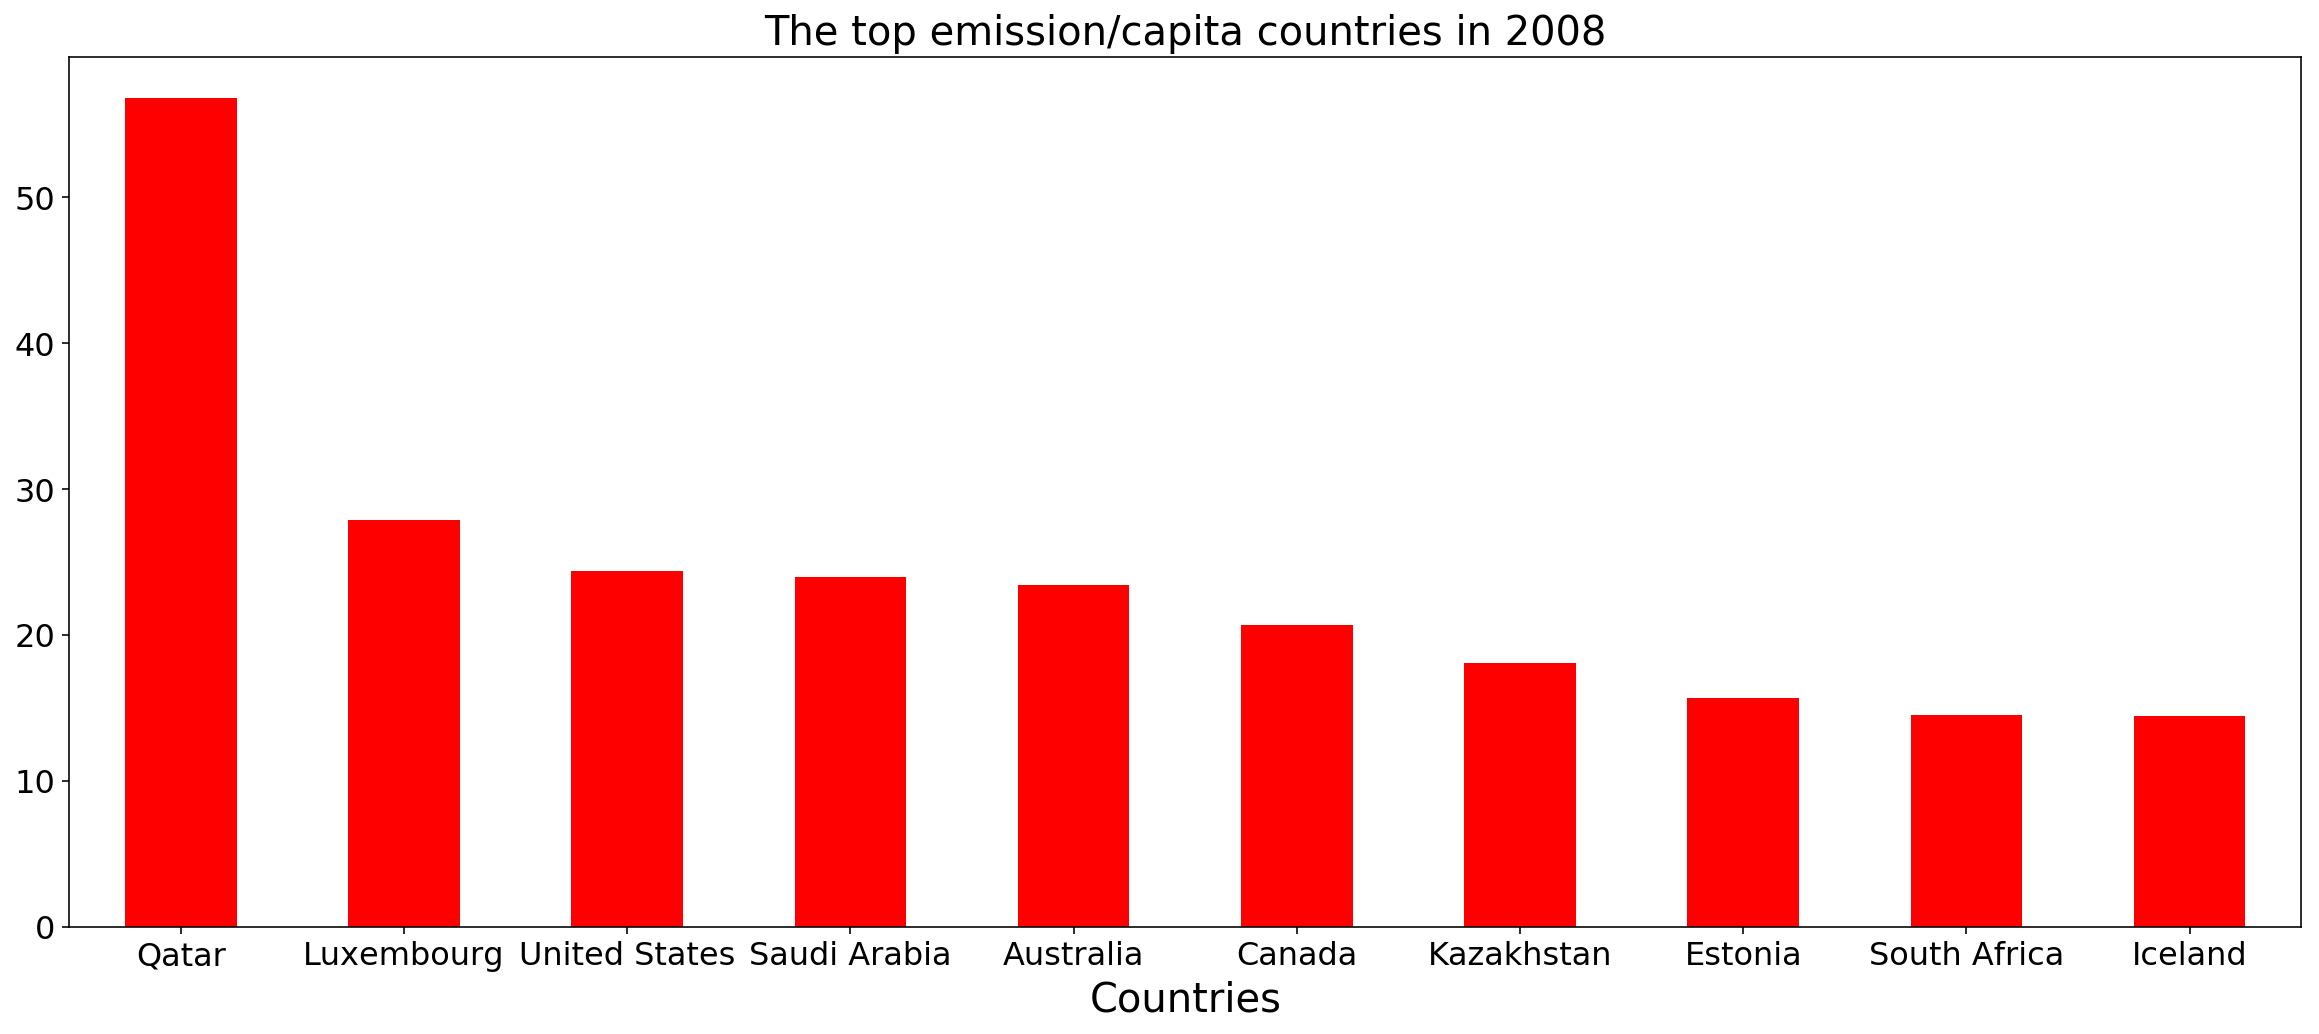

In [112]:
dx = df_most_cemission.plot.bar(rot=0, figsize=(20,8), color = 'red')
plt.title('The top emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [113]:
df_most_cemission_awareness = sort_country_emission_awareness_2008['Aware'].head(10)
df_most_cemission_awareness

Entity
Qatar            64.687182
Luxembourg       95.045039
United States    97.743534
Saudi Arabia     48.765197
Australia        97.324499
Canada           95.383371
Kazakhstan       60.271706
Estonia          88.469069
South Africa     31.414458
Iceland          94.660749
Name: Aware, dtype: float64

Text(0.5, 0, 'Countries')

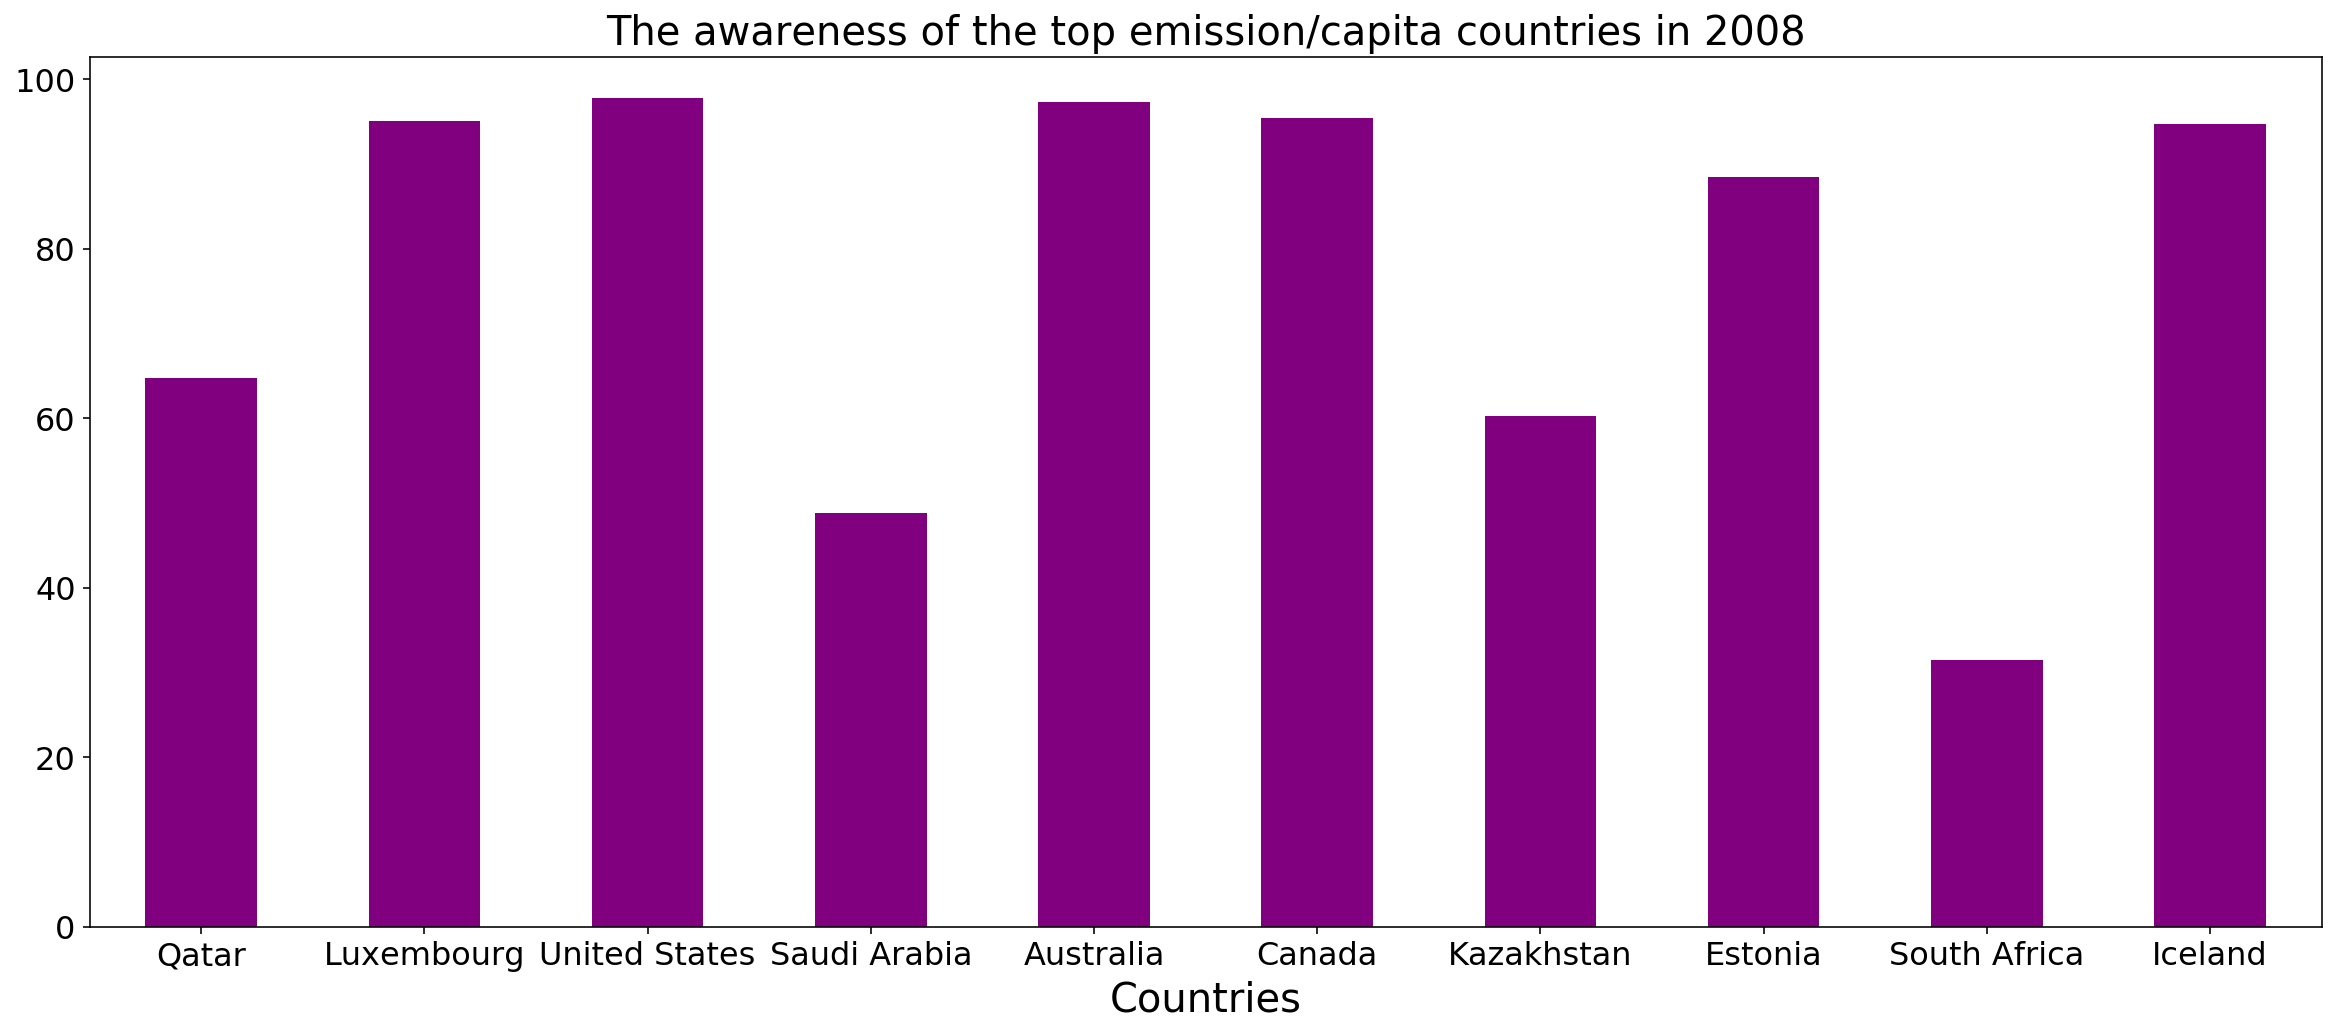

In [117]:
ex = df_most_cemission_awareness.plot.bar(rot=0, figsize=(20,8), color = 'purple')
plt.title('The awareness of the top emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [137]:
most_emission_awareness = sort_country_emission_awareness_2008.head(10)
most_emission_awareness = most_emission_awareness.reset_index()
most_emission_awareness

,Entity,Emission/capita,Aware
0,Qatar,56.800698,64.687182
1,Luxembourg,27.852109,95.045039
2,United States,24.412801,97.743534
3,Saudi Arabia,23.986700,48.765197
4,Australia,23.422434,97.324499
5,Canada,20.648233,95.383371
6,Kazakhstan,18.099565,60.271706
7,Estonia,15.704838,88.469069
8,South Africa,14.540640,31.414458
9,Iceland,14.450872,94.660749


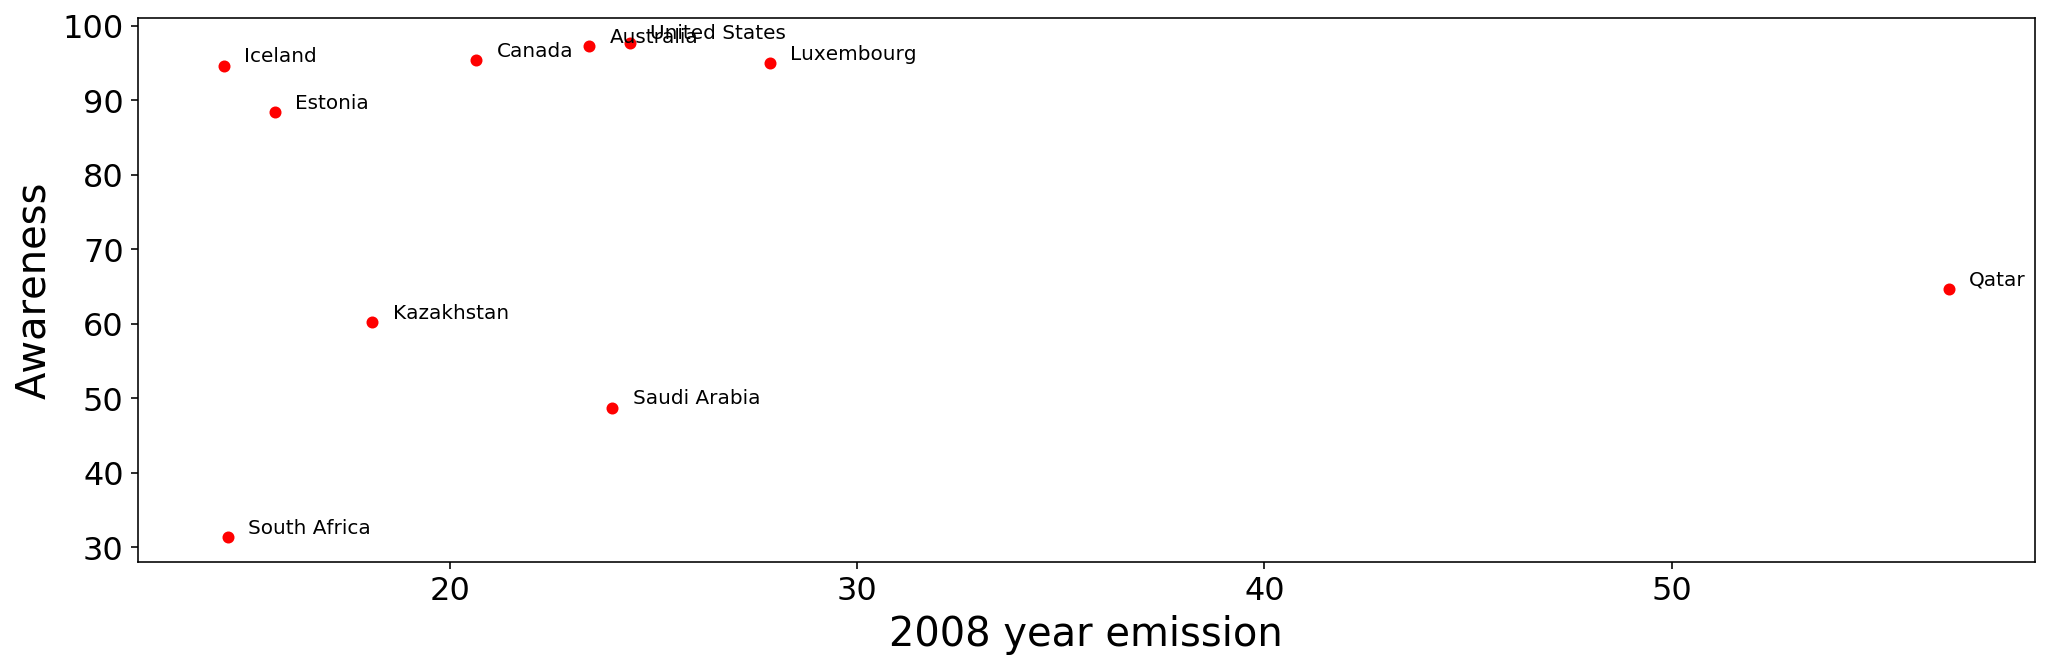

In [138]:
x = most_emission_awareness['Emission/capita']
y = most_emission_awareness['Aware']
types = most_emission_awareness['Entity']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 10)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 10)
    plt.xlabel('2008 year emission', fontsize = 20)
    plt.ylabel('Awareness', fontsize = 20)

In [169]:
least_emission_awareness = country_emission_awareness_2008.tail(10).drop(columns = ['Annual CO₂ emissions(tonnes)','Population.2008'])
least_emission_awareness = least_emission_awareness.sort_values(by = ['Emission/capita'], ascending = True)
least_emission_awareness

,Emission/capita,Aware
Entity,,
Burundi,0.039451,21.722146
Chad,0.090789,45.026337
Rwanda,0.095557,30.239067
Mali,0.152342,52.543511
Madagascar,0.169477,49.075389
Mozambique,0.181187,54.130277
Uganda,0.197275,34.853809
Sierra Leone,0.207257,35.913370
Nepal,0.211113,36.757496


In [170]:
df_least_cemission = least_emission_awareness['Emission/capita'].tail(10)
#df_least_cemission = sort_values(by = ['Emission/capita'], ascending = False)

Text(0.5, 0, 'Countries')

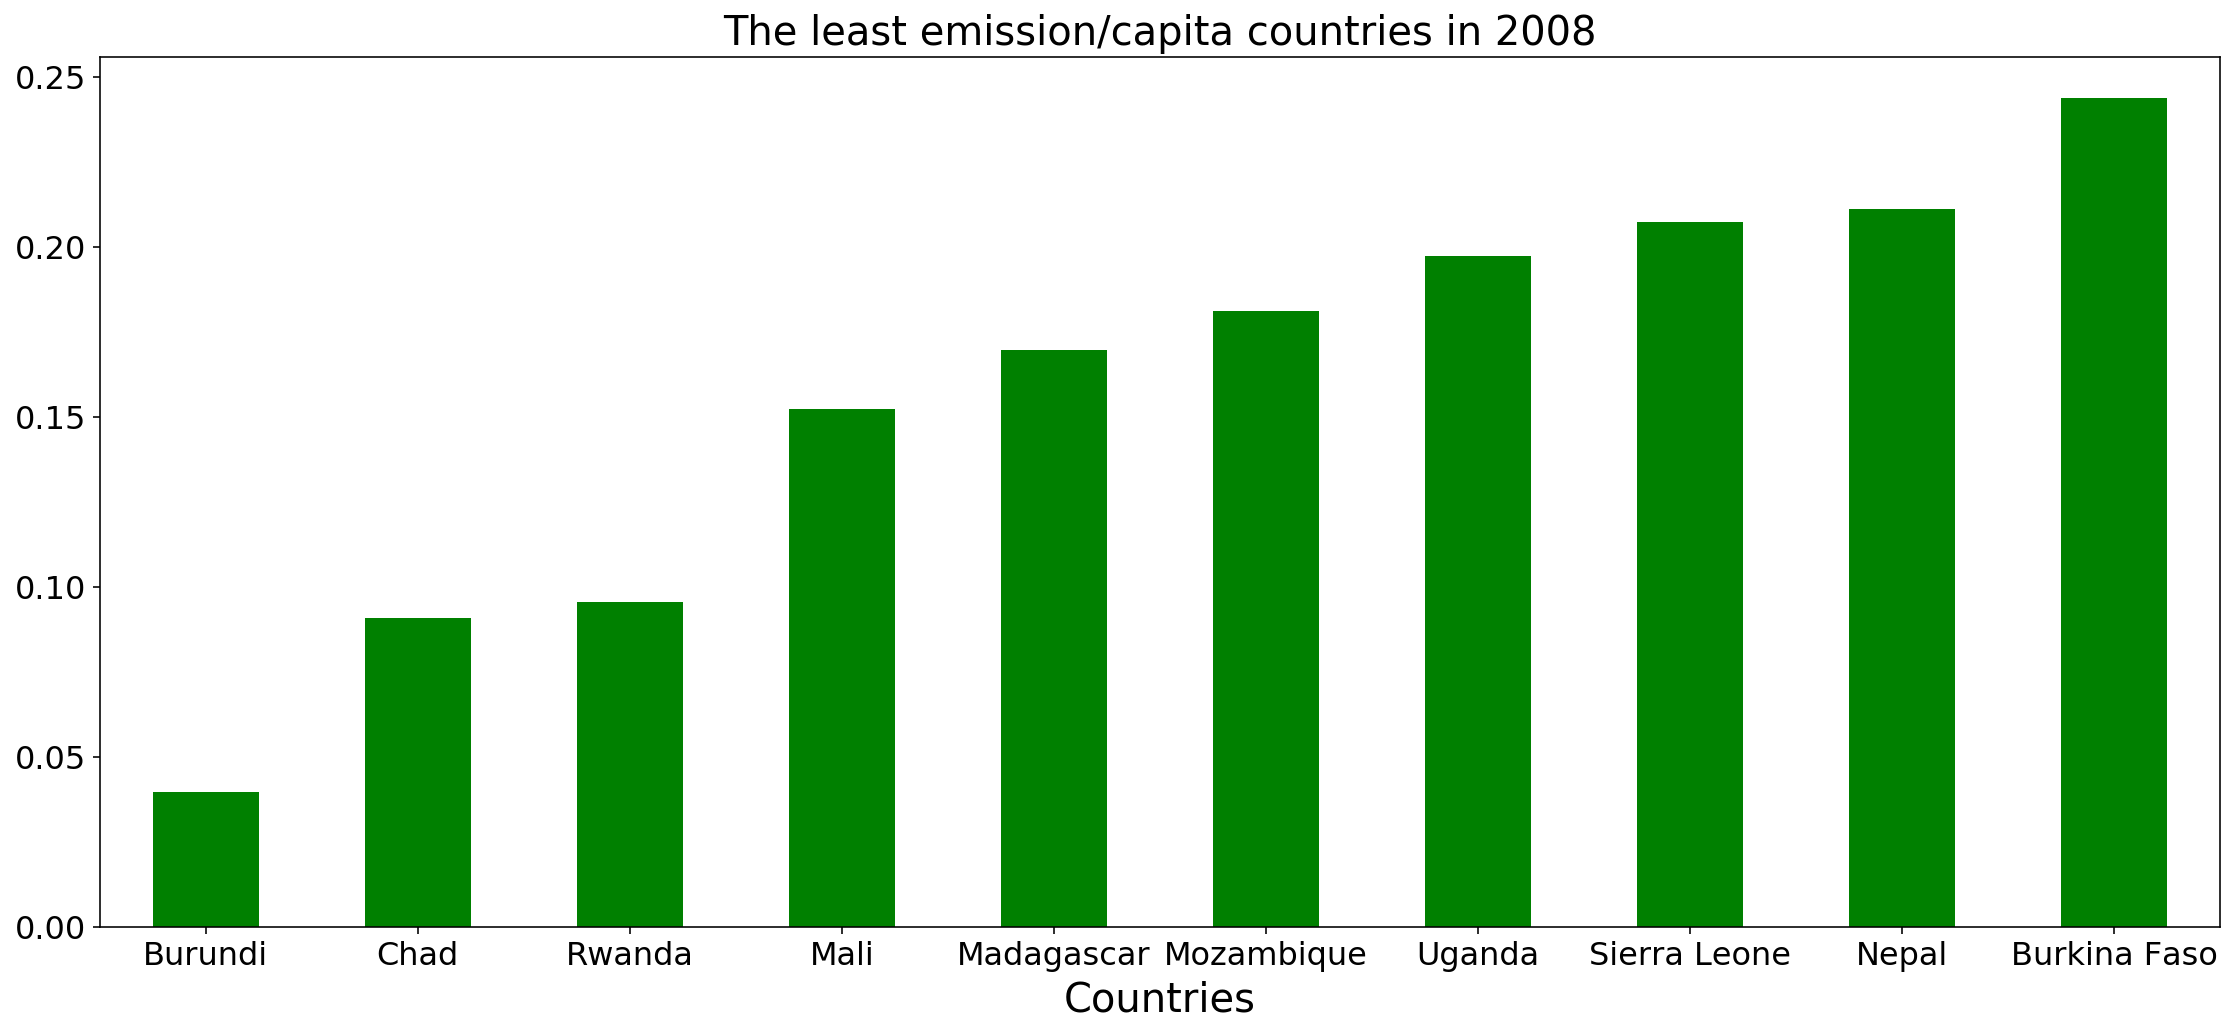

In [171]:
ex = df_least_cemission.plot.bar(rot=0, figsize = (19,8), color = 'green')
plt.title('The least emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [172]:
df_least_cemission_awareness = least_emission_awareness['Aware']
df_least_cemission_awareness 

Entity
Burundi         21.722146
Chad            45.026337
Rwanda          30.239067
Mali            52.543511
Madagascar      49.075389
Mozambique      54.130277
Uganda          34.853809
Sierra Leone    35.913370
Nepal           36.757496
Burkina Faso    36.017963
Name: Aware, dtype: float64

Text(0.5, 0, 'Countries')

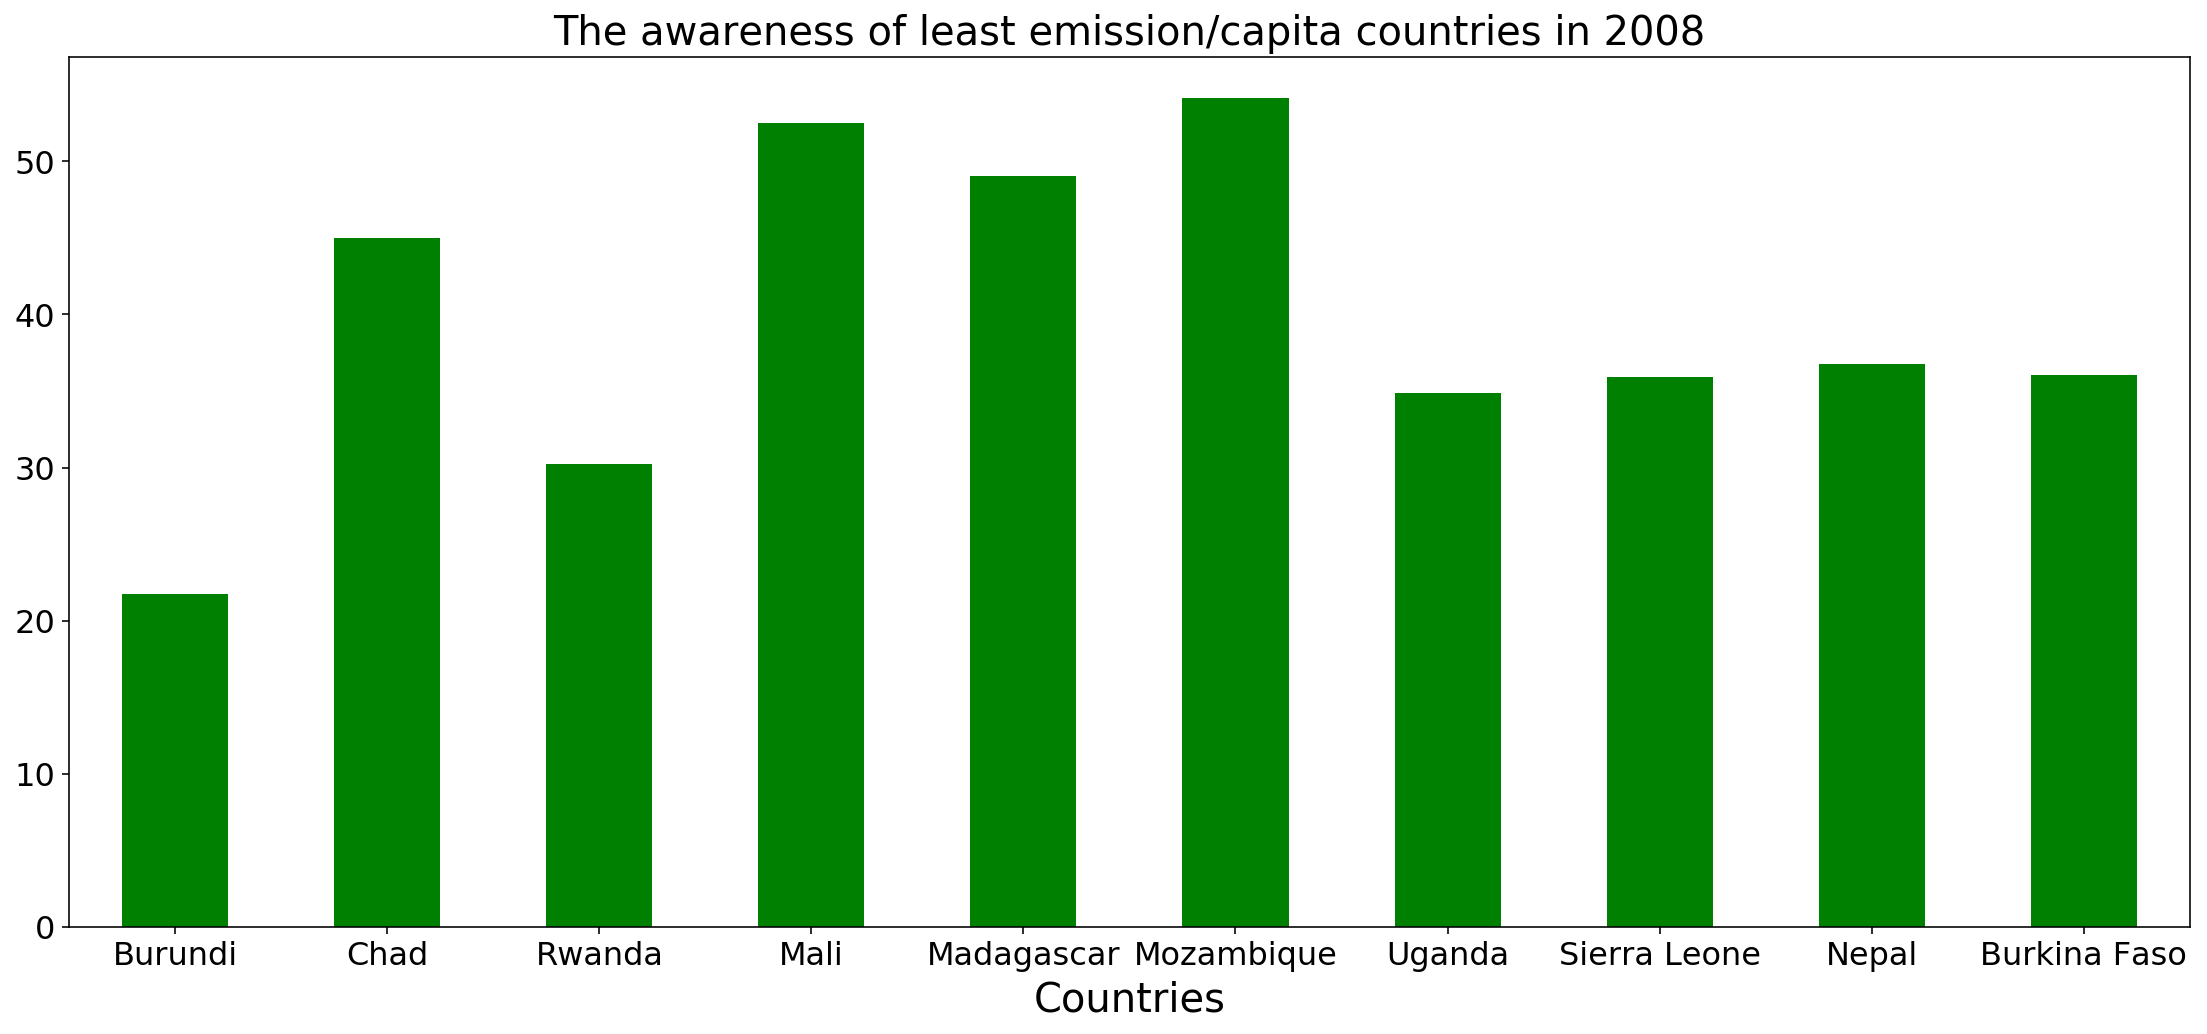

In [174]:
fx = df_least_cemission_awareness.plot.bar(rot=0, figsize = (19,8), color = 'green')
plt.title('The awareness of least emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

In [175]:
least_emission_awareness = least_emission_awareness.reset_index()
least_emission_awareness

,Entity,Emission/capita,Aware
0,Burundi,0.039451,21.722146
1,Chad,0.090789,45.026337
2,Rwanda,0.095557,30.239067
3,Mali,0.152342,52.543511
4,Madagascar,0.169477,49.075389
5,Mozambique,0.181187,54.130277
6,Uganda,0.197275,34.853809
7,Sierra Leone,0.207257,35.913370
8,Nepal,0.211113,36.757496
9,Burkina Faso,0.243659,36.017963


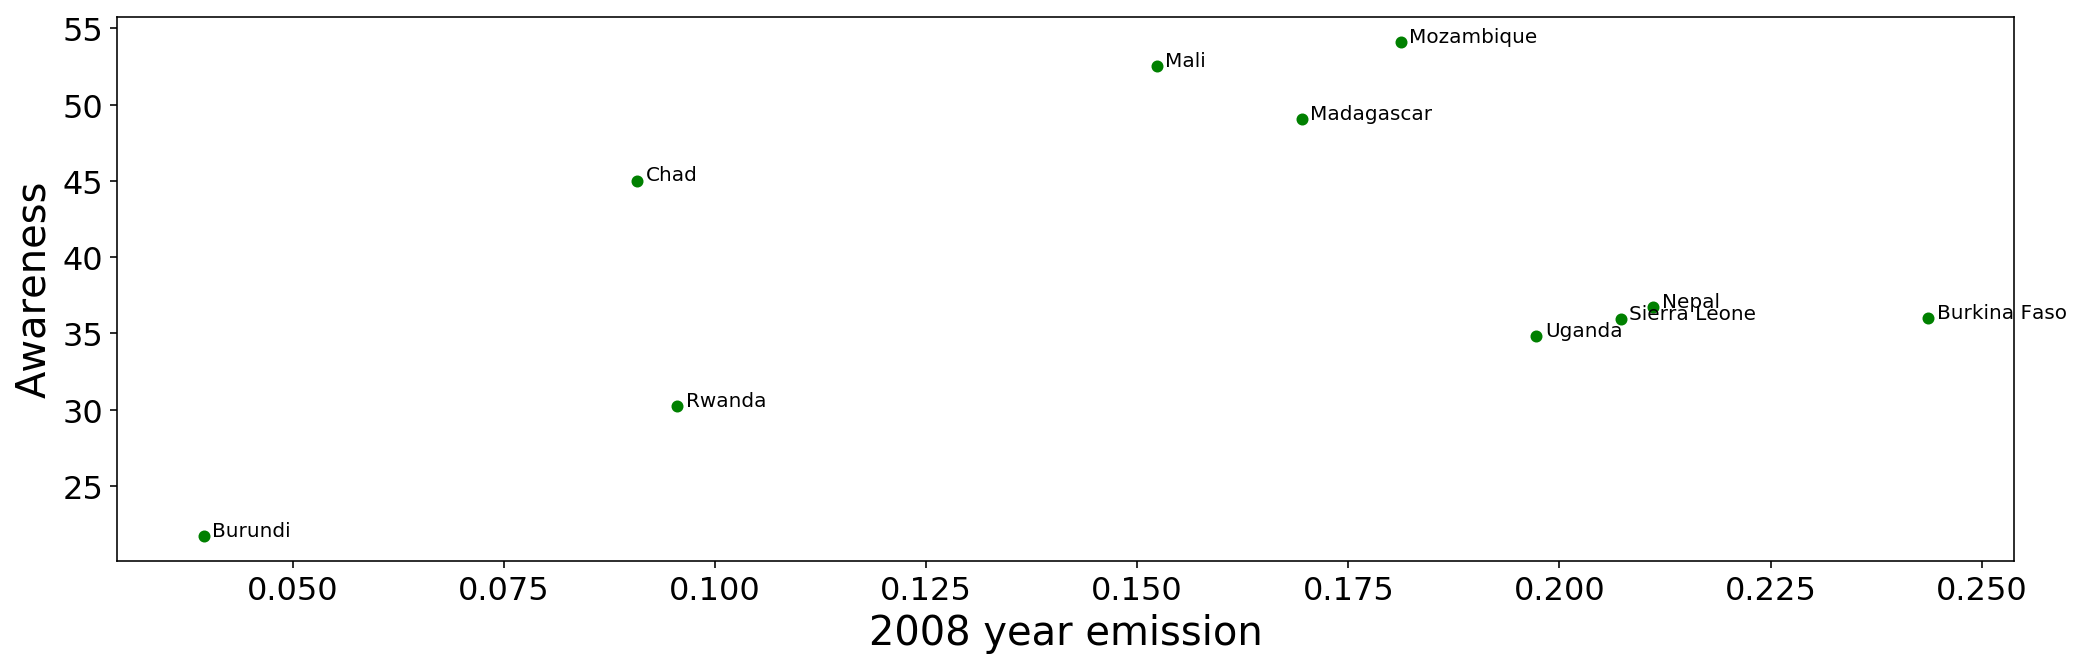

In [176]:
x = least_emission_awareness['Emission/capita']
y = least_emission_awareness['Aware']
types = least_emission_awareness['Entity']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'green', markersize = 10)
    plt.text(x_coor+0.001, y_coor+0.001, j, fontsize = 10)
    plt.xlabel('2008 year emission', fontsize = 20)
    plt.ylabel('Awareness', fontsize = 20)